In [18]:
# import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plts
import pickle


# Load the data

In [2]:
#LOAD DATA
data_file = r"C:\Users\Pratiksha\Downloads\archive\creditcard.csv"
data=pd.read_csv(data_file)

In [3]:
data[0:6]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [4]:
#find total observations in dataset
len(data.index)


284807

In [5]:
len(data.columns)


31

# Define Predictor and Target 

In [6]:
#FIT LOGISTIC REGRESSION MODEL
#Predictor
X = data.drop(["Class"], axis=1)

# Traget
y = data['Class']

In [7]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Train Test split

In [10]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Instantiate the model 

In [14]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

C:\Users\Pratiksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predict Fraud or Not

In [15]:
#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

# Confusion matrix

In [16]:
#MODEL DIAGNOSTICS
Confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
Confusion_matrix


Accuracy: 0.998934962489613


# Accuracy

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.998934962489613


# Plot ROC Curve

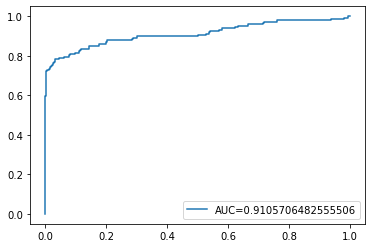

In [17]:
#plot ROC curve
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Save the model as a Pickel file

In [21]:
#Save the model
pickle.dump(log_regression,open('regmodel.pkl','wb'))

# Use the pickle file to Load the model to compare results


In [33]:
# Loading the model to compare results
model=pickle.load(open('regmodel.pkl','rb'))
#print(X_test)
print(X_test[0:1])
X_test1 = X_test[0:1]
#print(model.predict(X_test[0:99]))


            Time        V1        V2        V3        V4        V5        V6  \
183484  125821.0 -0.323334  1.057455 -0.048341 -0.607204  1.259821 -0.091761   

              V7        V8       V9  ...       V20       V21      V22  \
183484  1.159101 -0.124335 -0.17464  ...  0.186409 -0.207098 -0.43389   

             V23       V24       V25       V26       V27       V28  Amount  
183484 -0.261613 -0.046651  0.211512  0.008297  0.108494  0.161139    40.0  

[1 rows x 30 columns]


In [34]:
print(model.predict(X_test1))

[0]
